In [1]:
#from solver import Span, Beam, Solver, BendingMoment
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [26]:
x[span_Q][n_span]

0

In [14]:
r[span_Q][n_span]

1.50000000000000

In [70]:
x[0]

Matrix([[0]])

In [73]:
nCampate = 1
lenghts = [1.]
x =[sp.zeros(1,2),sp.zeros(1,2)]
list_of_R = [] # ---- oppure mettere - X + L/2: 
for n_span in range(nCampate):
    mat1 = sp.Matrix([  (x[n_span][i+1] - x[n_span][i])/lenghts[i] for i in range(0,nCampate)  ])
    mat2 = sp.Matrix(lenghts[n_span]/2 * np.identity(nCampate)[n_span])
    list_of_R.append(mat2)
list_of_R

[Matrix([[0.5]])]

In [78]:
sp.Matrix([])

Matrix(0, 0, [])

In [50]:
I = np.identity(1)
span_Q = 0
n_span = 0
cum_lenghts=[0., 1.]
s = sp.Symbol('s')
x = [sp.zeros(1,1),sp.zeros(1,1)]
r = [sp.Matrix([[1.5]])]

m_i = ((x[span_Q][n_span] + r[span_Q][n_span] * (s-cum_lenghts[n_span])) - ((I[span_Q,n_span]*(s-cum_lenghts[span_Q])**2)/2)) \
                    * (sp.Heaviside(s-cum_lenghts[n_span]) - sp.Heaviside(s-cum_lenghts[n_span+1]))
m_i_lambdify = sp.lambdify(s,np.sum(m_i,axis=0))

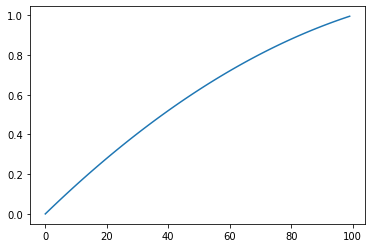

In [25]:
plt.plot(m_i_lambdify(np.arange(0,1,0.01)))

In [2]:
J = (0.3 * 0.5**3)/12 # m4
EJ =  31476*1000000*J/1000 # Mpa * m4 -> N*m2 -> kN*m2

c_1 = Span(lenght = 3.00, ej = EJ)
c_2 = Span(lenght = 4.50, ej = EJ)
c_3 = Span(lenght = 4.00, ej = EJ)
c_4 = Span(lenght = 5.00, ej = EJ)
c_5 = Span(lenght = 6.15, ej = EJ)
c_6 = Span(lenght = 4.00, ej = EJ)

trave = Beam(spans = [c_1, c_2, c_3, c_4, c_5, c_6])

NameError: name 'Span' is not defined

In [3]:
print(f"{trave.spans_lenght() = }")
print(f"{trave.spans_total_lenght() = }")
print(f"{trave.spans_cum_lenght() = }")
print(f"{trave.spans_ej() = }")
print(f"{trave.spans_q_max() = }")
print(f"{trave.spans_q_min() = }")


trave.spans_lenght() = [3.0, 4.5, 4.0, 5.0, 6.15, 4.0]
trave.spans_total_lenght() = 26.65
trave.spans_cum_lenght() = array([ 0.  ,  3.  ,  7.5 , 11.5 , 16.5 , 22.65, 26.65])
trave.spans_ej() = [98362.49999999999, 98362.49999999999, 98362.49999999999, 98362.49999999999, 98362.49999999999, 98362.49999999999]
trave.spans_q_max() = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
trave.spans_q_min() = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [8]:
J = (0.3 * 0.5**3)/12 # m4
EJ =  31476*1000000*J/1000 # Mpa * m4 -> N*m2 -> kN*m2

c_1 = Span(lenght = 3.00, ej = EJ)
c_2 = Span(lenght = 4.50, ej = EJ)
c_3 = Span(lenght = 4.00, ej = EJ)
c_4 = Span(lenght = 5.00, ej = EJ)
c_5 = Span(lenght = 6.15, ej = EJ)
c_6 = Span(lenght = 4.00, ej = EJ)

trave = Beam(spans = [c_1, c_2, c_3, c_4, c_5, c_6], supports='incastre-right')

run = Compute(trave)

a = run.bending_moment_span_Q(1)

In [96]:
x = run.generate_expanded_x_solutions()
r = run.generate_R_solutions()
cum_lenghts = trave.spans_cum_lenght()
nCampate = 6
span_Q = 0
s = sp.Symbol('s')
I = np.identity(nCampate)
m_i = [
                    ((-x[span_Q][n_span] - r[span_Q][n_span] * (s-cum_lenghts[n_span])) - ((I[span_Q,n_span]*(s-cum_lenghts[span_Q])**2)/2)) \
                    * (sp.Heaviside(s-cum_lenghts[n_span]) - sp.Heaviside(s-cum_lenghts[n_span+1])) \
                for n_span in range(nCampate)
            ]

In [54]:
- x[0]

Matrix([
[                   0],
[  -0.491338912574569],
[   0.137796375248564],
[ -0.0328783181600082],
[ 0.00812484517717799],
[-0.00273048075626473],
[ 0.00136524037813237]])

In [55]:
- r[0]

Matrix([
[    1.33622036247514],
[   0.139807841738474],
[ -0.0426686733521432],
[ 0.00820063266743724],
[-0.00176509364771426],
[ 0.00102393028359927]])

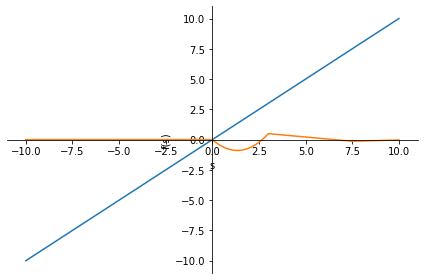

In [82]:
sp.plot(s,-np.sum(m_i,axis=0))

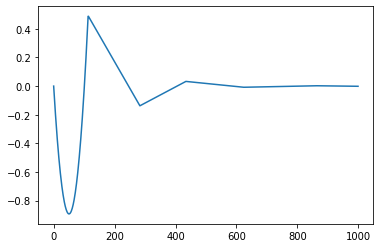

In [97]:
m_i_lambdify = sp.lambdify(s,-np.sum(m_i,axis=0))

s_func = np.linspace(0, 26.5, 1000)

m = m_i_lambdify(s_func)
plt.plot(m)

In [92]:
# np.savetxt('prova.txt',np.array([s_func, m_i_lambdify(s_func)]).transpose())

In [ ]:
x1 = Span(1,2)
x2 = Span(5,6)
x3 = Span(1.5, 7.6)
beam = Beam([x1,x2,x3])

for span in beam.spans: 
    print(span.ej)

print(beam.spans_lenght())
print(beam.spans_ej())
print(beam.spans_q_max())
print(beam.spans_q_min())


2
6
7.6
[1, 5, 1.5]
[2, 6, 7.6]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]


In [103]:
list_of_xy_lists = [[[1,2,3,8],[1,2,4,6]]]
for xy in list_of_xy_lists:
    x,y = xy[0] ,xy[1]
    print(x)
    print(y)

[1, 2, 3, 8]
[1, 2, 4, 6]


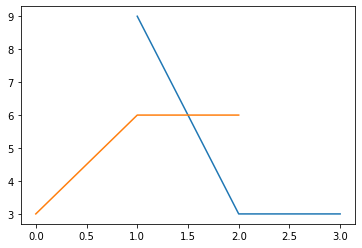

In [140]:

plt.plot([1,2,3], [9,3,3],[3,6,6])

In [122]:
a = [1].append(a)
print(a)

None


In [126]:
print([].extend(["2",3]))

None


In [127]:
a = []

In [128]:
a.append(3)

In [129]:
a

[3]

In [133]:
a.extend([1,2])

In [134]:
a

[3, [1, 2], 1, 2]

In [114]:
a = [1,-2,3,4]
b = [2,-1,5,6]

a = np.array(a)
np.where(a==-2)[0][0]

array([1], dtype=int64)

In [89]:
Mmax = np.zeros(len(a))
Mmin = np.zeros(len(a))
for i in range (0, len(a)):
    Mmax[i] = max(a[i], b[i])
Mmax

array([2., 6., 5., 6.])

In [97]:
np.min([a,b], axis=0, initial=0)

array([ 0, -2,  0,  0])

In [125]:
import pandas as pd


In [119]:
n = 6
string1 = "a"
[f"{string1}_{i}" for i in range(1,n+2)]


['a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'a_6', 'a_7']

In [158]:
header = ['A1', 'C1', 'A2', 'C2', 'A3', 'C3', 'A4']
m_pos = [10,2,3,4,5,6,7]

df = pd.DataFrame([m_pos], columns=header, index=['M_pos'])
df

,A1,C1,A2,C2,A3,C3,A4
M_pos,10,2,3,4,5,6,7


In [170]:
df.style.to_latex(position='H', hrules=True, siunitx=True)

'\\begin{table}[H]\n\\begin{tabular}{lSSSSSSS}\n\\toprule\n{} & {A1} & {C1} & {A2} & {C2} & {A3} & {C3} & {A4} \\\\\n\\midrule\nM_pos & 10 & 2 & 3 & 4 & 5 & 6 & 7 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

In [168]:
df.style.to_latex?

Signature:
df.style.to_latex(
    buf: 'FilePath | WriteBuffer[str] | None' = None,
    *,
    column_format: 'str | None' = None,
    position: 'str | None' = None,
    position_float: 'str | None' = None,
    hrules: 'bool | None' = None,
    clines: 'str | None' = None,
    label: 'str | None' = None,
    caption: 'str | tuple | None' = None,
    sparse_index: 'bool | None' = None,
    sparse_columns: 'bool | None' = None,
    multirow_align: 'str | None' = None,
    multicol_align: 'str | None' = None,
    siunitx: 'bool' = False,
    environment: 'str | None' = None,
    encoding: 'str | None' = None,
    convert_css: 'bool' = False,
)
Docstring:
Write Styler to a file, buffer or string in LaTeX format.

.. versionadded:: 1.3.0

Parameters
----------
buf : str, path object, file-like object, or None, default None
    String, path object (implementing ``os.PathLike[str]``), or file-like
    object implementing a string ``write()`` function. If None, the result is
    returned as a 

In [233]:
def find_local_max_xy(x: np.array, y:np.array, a:float, b:float, tol) -> tuple: #TODO sistemare il typing
    """
    Find the local max y value of and x,y plot and the associated x, corresponding to limits: x==a and x==b 

    x must be an np.array and should be an ordinated values array, like np.arange and np.linspace

    a: the initial value of x, not the corresponding index -> y[a_index : ]
    b: the final value of x, not the corresponding index


    Doesn't prevent the case where there are more y max values (like in a costant y plot). 
    In this case only the first occurrence is returned
    """
    a_index = np.where((x >= a - tol) & (x <= a + tol))[0][0]
    b_index = np.where((x >= b - tol) & (x <= b + tol))[0][0]
    index = np.argmax(y[a_index:b_index])
    return x[index], y[index]
def find_max_xy(x: list, y:list) -> tuple:
    """
    Find the max y value of and x,y plot and the associated x. 

    Doesn't prevent the case where there are more y max values (like in a costant y plot). 
    In this case only the first occurrence is returned. See find_max_xy_all instead
    """
    index = np.argmax(y)
    return x[index], y[index]

In [237]:
x = np.arange(0,7,0.0001)
find_local_max_xy(x,np.sin(x),6.5,6.9,0.0001/2)

(0.39990000000000003, 0.38932623426231205)

In [244]:
np.sin(x)[65000:69000]

array([0.21511999, 0.21521765, 0.2153153 , ..., 0.57819502, 0.57827661,
       0.57835819])

In [26]:
a = [0,4,5]
b = [0,44,52]
#l = a.extend(b)
(a +b
l

[0, 4, 5, 0, 44, 52]

In [37]:
a = [0, 4, 5, 0, 44, 52]
a[1:-1]

[4, 5, 0, 44]

In [28]:
l

[0, 0, 4, 5, 44, 52]

In [39]:
#for testing:
q_max_list = ["S1", "S2", "S3", "S4", "S5", "S6"]
q_min_list = ["F1", "F2", "F3", "F4", "F5", "F6"]
nCampate = 6        

# S S S S S  S ...
comb_0 = q_max_list
# S F S F S F ...
comb_1 = [q_max_list[i] if i%2 == 0 else q_min_list[i] for i in range(nCampate)]
# F S F S F S...
comb_2 = [q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(nCampate)]
# S S F S F S...
comb_3 = [q_max_list[0]]
comb_3.extend([q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(1,nCampate)])

comb_3 = [q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(nCampate)]
comb_3[0] = q_max_list[0]

In [46]:
[q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(nCampate)]


['F1', 'S2', 'F3', 'S4', 'F5', 'S6']

In [102]:

        # S S S S S S ...
        comb_0 = q_max_list
        # S F S F S F ...
        comb_1 = [q_max_list[i] if i%2 == 0 else q_min_list[i] for i in range(nCampate)]
        # F S F S F S...
        comb_2 = [q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(nCampate)]

        """
        S S F S F S...
        F S S F S F...
        S F S S F S...

        comb_j is a couple of [ S[j] , S[j+1] ] at j index. Then is added the left side and the right side to it. 
        if j = 1: ['F1', 'S2', 'S3', 'F4', 'S5', 'F6']
        if j = 2: ['S1', 'F2', 'S3', 'S4', 'F5', 'S6']
        """
        combs_SS: list[list] = []
        
        for j in range(0,nCampate-1): 
            comb_j = [q_max_list[j] , q_max_list[j+1]] 
            if j%2 == 0:
                comb_right = [q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(j+2,nCampate)]
                comb_left = [q_max_list[i] if i%2 == 0 else q_min_list[i] for i in range(0,j)]
            else:
                comb_right = [q_max_list[i] if i%2 == 0 else q_min_list[i] for i in range(j+2,nCampate)]
                comb_left = [q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(0,j)]

            comb_left.extend(comb_j)
            comb_left.extend(comb_right)
            combs_SS.append(comb_left)

        # Add all combinations in a list of lists:
        combs: list[list] = [comb_0, comb_1, comb_2]
        combs.extend(combs_SS)

In [104]:

# S S S S S S ...
comb_0 = q_max_list
# S F S F S F ...
comb_1 = [q_max_list[i] if i%2 == 0 else q_min_list[i] for i in range(nCampate)]
# F S F S F S...
comb_2 = [q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(nCampate)]

"""
S S F S F S...
F S S F S F...
S F S S F S...

comb_j is a couple of [ S[j] , S[j+1] ] at j index. Then is added the left side and the right side to it. 
if j = 1: ['F1', 'S2', 'S3', 'F4', 'S5', 'F6']
if j = 2: ['S1', 'F2', 'S3', 'S4', 'F5', 'S6']
"""
combs_SS: list[list] = []

for j in range(0,nCampate-1): 
    comb_j = [q_max_list[j] , q_max_list[j+1]] 
    if j%2 == 0:
        comb_right = [q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(j+2,nCampate)]
        comb_left = [q_max_list[i] if i%2 == 0 else q_min_list[i] for i in range(0,j)]
    else:
        comb_right = [q_max_list[i] if i%2 == 0 else q_min_list[i] for i in range(j+2,nCampate)]
        comb_left = [q_max_list[i] if i%2 == 1 else q_min_list[i] for i in range(0,j)]

    comb_left.extend(comb_j)
    comb_left.extend(comb_right)
    combs_SS.append(comb_left)

# Add all combinations in a list of lists:
combs: list[list] = [comb_0, comb_1, comb_2]
combs.extend(combs_SS)

combs

[['S1', 'S2', 'S3', 'S4', 'S5', 'S6'],
 ['S1', 'F2', 'S3', 'F4', 'S5', 'F6'],
 ['F1', 'S2', 'F3', 'S4', 'F5', 'S6'],
 ['S1', 'S2', 'F3', 'S4', 'F5', 'S6'],
 ['F1', 'S2', 'S3', 'F4', 'S5', 'F6'],
 ['S1', 'F2', 'S3', 'S4', 'F5', 'S6'],
 ['F1', 'S2', 'F3', 'S4', 'S5', 'F6'],
 ['S1', 'F2', 'S3', 'F4', 'S5', 'S6']]

In [101]:
combs= [[1,2],[2,3,4]]

combs.extend(combs_SS)
combs


[[1, 2],
 [2, 3, 4],
 ['S1', 'S2', 'F3', 'S4', 'F5', 'S6'],
 ['F1', 'S2', 'S3', 'F4', 'S5', 'F6'],
 ['S1', 'F2', 'S3', 'S4', 'F5', 'S6'],
 ['F1', 'S2', 'F3', 'S4', 'S5', 'F6'],
 ['S1', 'F2', 'S3', 'F4', 'S5', 'S6']]